# Scikit-Learn Practice Exercises

This notebook offers a set of exercises for different tasks with Scikit-Learn.

In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline
# Import the pyplot module of matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbr of "pd"
import pandas as pd
# Import numpy under the abbr of "np"
import numpy as np

## End-to-end Scikit-Learn Classification workflow

Let's start with an end-to-end Scikit-learn workflow

More specifically we'll,

1. Get a dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions

The data we'll be using is in repo. We'll start with `heart-disease.csv`, a dataset which contains anonymous patient data and whether or not they have heart disease.

### 1. Getting a dataset ready

In [2]:
# import the heart disease dataset and save it to a variable
heart_disease = pd.read_csv("heart-disease.csv")

# check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Our goal here is to build a machine learning model on all of the columns except `target` to predict `target`.

In essence, the `target` column is our **target variable**(also called `y` or `labels`) and the rest of the other columns are our independent variables (also called `data` or `X`)

And since our target variable is one thing or another (heart disease or not), we know our problem is a classification problem(classifying whether something is one thing or another).

Knowing this, let's create `X` and `y` by splitting our dataframe up.

In [3]:
# Create X (all columns except target)
X = heart_disease.drop("target", axis=1)

# Create y (only the target column)
y = heart_disease["target"]

Now we've split our data into `X` and `y`, we'll use Scikit-learn to split it into training and test sets.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# View the different shapes of the training and test datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

Since our data is now ready and splitted into training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions using test data.

To choose which estimator we'll use, We can go through Scikit-learn's machine learning map.

After following the map, we decided to use the `RandomForestClassifier`

### 2. Picking a machine learning model

In [6]:
# import RandomForestClassifer
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier
clf = RandomForestClassifier()

Now we've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [7]:
# fit the RandomForestClassifier with the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Use the fitted model to make predictions on the test data and save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Evaluating predictions is as important making them. Let's check how our model did by calling the `score()` method on it and passing it the training (`X_train`,`y_train`) and testing data(`X_test`,`y_test`)

In [9]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [10]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test,y_test)

0.7049180327868853

## Experimenting with different classification models

For this exercise, the models we're going to try and compare are:
* LinearSVC
* KNeighborsClassifier(Also known as K-Nearest Neighbors or KNN)
* SVC(also known as support vector classifier, a form of support vector machine)
* LogisticRegression(despite the name, this is actually a classifier)
* RandomForestClassifier(an ensemble method and what we used above)

We'll follow the same workflow we used above (except this time for multiple models):
1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

**Note**: Since we've already got the data ready, we can reuse it in this section.

In [11]:
# Import LinearSVC
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import SVC
from sklearn.svm import SVC

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# RandomForestClassfier is already imported

Thanks to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each of our model.

To see which model performs best, we'll do the following:

1. Instantiate each model into a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check results

In [12]:
np.random.seed(42)

# Instantiate each model into a dictionary
model_dict = {"RandomForestClassifier":RandomForestClassifier(), 
              "LinearSVC":LinearSVC(),
              "KNeighborsClassifier":KNeighborsClassifier(),
              "SVC":SVC(),
              "LogisticRegression":LogisticRegression()}

# Create an empty results dictionary
results_dict = dict()

for model_name, model in model_dict.items():
    # Fit each model on the training data
    model.fit(X_train, y_train)
    # Score each model on the test data
    results_dict[model_name] = model.score(X_test, y_test)

# check results
results_dict

/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.7049180327868853,
 'LinearSVC': 0.6229508196721312,
 'KNeighborsClassifier': 0.47540983606557374,
 'SVC': 0.5081967213114754,
 'LogisticRegression': 0.7377049180327869}

Let's make our results more visual.

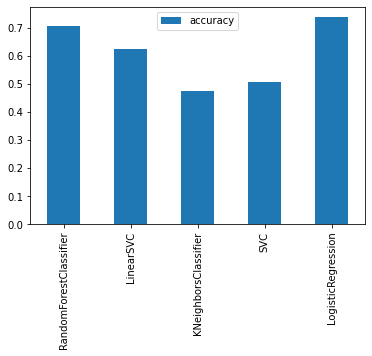

In [13]:
# Create a pandas dataframe with the data as the values of the results dictionary, 
# the index as the keys of the results dictionary and a single column called accuracy
# Be sure to save the dataframe to a variable
results_df = pd.DataFrame(data=results_dict.values(), index=results_dict.keys(), columns=["accuracy"])

results_df.plot.bar();

Let's tune the hyperparameters and see if can improve it.

## Hyperparameter Tuning

For Hyperparameter tuning we can choose either `GridSearchCV` or `RandomizedSearchCV`

In [14]:
# first checking RandomizedSearchCV

#let's created the dictionary of various hyperparameters of LogisticRegression 
log_reg_grid = {"C":np.linspace(-4,4,20),
                "solver":["liblinear"]}

Since we've got a set of hyperparameters we can import RandomizedSearchCV, pass it our dictionary and let it search for the best combination.

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# setup random seed
np.random.seed(42)

# Setup an instance of RandomizedSearchCV with a LogisticRegression estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 5,
                               verbose=1)

# fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1094, in 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [16]:
# find the best parameters of the RandomizedSearchCV instance using best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 3.1578947368421044}

In [17]:
# Score the instance of RandomizedSearchCV instance using best_score_ attribute
rs_log_reg.best_score_

0.8551870748299321

After hyperparameter tuning, did the models score improve ? What else could we can try to improve it? Are there any other methods of hyperparameter tuning we can use for LogisticRegression ?

## Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using `RandomizedSearchCV` and so far we've only been evaluating our model using `score()`
function which returns accuracy by default.


But when it comes to classification, we'll likely want to use a few more evaluation metrics, including:
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area Under Curve(AUC)

In [18]:
# we will instantiate the LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(C=3.157, solver="liblinear")

# fit the new instance
clf.fit(X_train, y_train)

LogisticRegression(C=3.157, solver='liblinear')

In [19]:
# now import the sklearn metrics for each of the classification evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve

In [20]:
# let's make some predictions
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [21]:
# create confusion matrix using confusion matrix function
confusion_matrix(y_test,y_preds)

array([[22, 11],
       [ 5, 23]])

This seems not too much visual, how could you make your confusion matrix more visual ?

/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


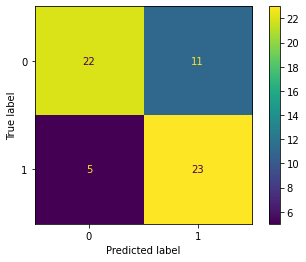

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)

In [23]:
# Create a classfication report using classification_report function
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



In [24]:
# find the precision_score
precision_score(y_test, y_preds)

0.6764705882352942

In [25]:
# find the recall_score
recall_score(y_test, y_preds)

0.8214285714285714

In [26]:
# find the f1_score
f1_score(y_test, y_preds)

0.7419354838709677

/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


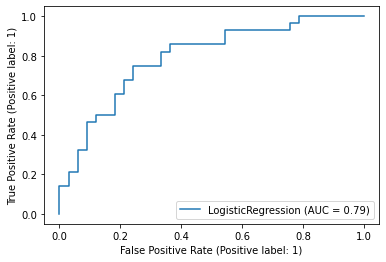

In [27]:
# plot a roc curve
plot_roc_curve(clf, X_test, y_test);

In [28]:
# find cross_val_score
cross_val_score(clf, X, y, scoring="accuracy", cv = 5 )

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [29]:
# find the mean of the cross_val_score
np.mean(cross_val_score(clf, X, y, scoring="accuracy", cv=5))

0.8248633879781421

We can similarly find the cross_val_score of precision, recall and f1 metrics

In [30]:
#  cross_val_score of precision
cross_val_score(clf, X, y, scoring="precision", cv =5)

array([0.78947368, 0.90322581, 0.85294118, 0.83783784, 0.71052632])

In [31]:
# cross_val_score of recall
cross_val_score(clf, X, y, scoring="recall", cv=5)

array([0.90909091, 0.84848485, 0.87878788, 0.93939394, 0.81818182])

In [32]:
# cross val score of f1
cross_val_score(clf, X, y, scoring="f1", cv=5)

array([0.84507042, 0.875     , 0.86567164, 0.88571429, 0.76056338])

## Exporting and Importing a trained model

In scikit-learn, exporting and importing a trained model is called as model persistence.

In [33]:
# import the dump and load function from joblib library
from joblib import dump, load

In [34]:
# use dump function to export the trained model to file
dump(clf, filename="sk_practice_log_regression_model.joblib")

['sk_practice_log_regression_model.joblib']

In [35]:
# use load function to import the trained model
loaded_clf = load("sk_practice_log_regression_model.joblib")

# evaluation the loaded trained model on the test data
loaded_clf.score(X_test, y_test), clf.score(X_test, y_test)

(0.7377049180327869, 0.7377049180327869)

# Scikit-Learn Regression Practice

Now for regression problem we have to import a separate dataset, so let's import it.

Our dataset is a table of car sales, containing different car characteristics as well as a sale price.

We'll use Scikit-learn's built-in regression machine learning models to try and learn the patterns in the car characteristics and their prices on a certain group of the dataset before trying to predict the sale price of a group of cars the model has never seen before.


In [59]:
# Read and import the car sales
car_sales = pd.read_csv("car-sales-extended-missing-data.csv")

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
# get information about the car sales dataframe
car_sales.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


Looking into the output of `info()`

* How many rows are there total?
* What datatypes are in each column?
* How many missing values are there in each column ?


We have 4 feature variables, `Make`, `Colour`, `Odometer (KM)`, `Doors`
and 1 target variables i.e `Price`, which are going to predict.

Also we have 2 `object` type columns and 3 `float` type columns.

In [40]:
# get the datatype of the all the columns
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

We know that to use machine learning algorithms, we have to convert all the non-numeric columns into numbers then only machines can learn pattern from them.

Also before that, check how many columns have null data.

In [44]:
# get the null count in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Actions to perform now after observing the dataset,

* Remove the rows right away which has null in target variable (`Price`)
* Encode the categorical non-numerical columns (`Make`, `Colour`) into numeric
* Fill the categorical numerical column (`Doors`) with average value i.e 4
* Fill the missing numerical column (`Odometer (KM)`) with median


For this we have to build a pipeline.

## Building a Pipeline

There are ways we could do this with pandas but since we're practising scikit-learn, we'll see how we might do it with the `Pipeline` class.

We'll need `ColumnTransformer`, `SimpleImputer`, `OneHotEncoder` classes to do this. Let's import all these.

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [66]:
# 1. Remove null rows from target variable
car_sales.dropna(subset=["Price"], inplace=True)

In [67]:
# view the car_sales
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  902 non-null    float64
 3   Doors          903 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


In [80]:
# Now we can start building the pipeline

# categorical columns and numerical
categorical = ["Make", "Colour"]
categorical_numerical = ["Doors"]
numerical = ["Odometer (KM)"]

# create the column transformer pipeline for each
categorical_transformer = Pipeline(steps=[
    # set Simple Imputer strategy to "constant" and fill missing value
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set one hot encode to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

categorical_numerical_transformer = Pipeline(steps=[
    #set imputer strategy to "constant" and fill missing value with 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numerical_transformer = Pipeline(steps=[
    # set imputer startegy to "Median" for missing values
    ("imputer", SimpleImputer(strategy="median"))
])

Time to put all our individual transformer `Pipeline` into a single `ColumnTransformer`

In [81]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    # Use the categorical transformer to transform the categorical features
    ("cat", categorical_transformer, categorical),
    # Use categorical numerical feature to transform
    ("cat_num", categorical_numerical_transformer, categorical_numerical),
    # Use numerical transformer to transform numerical feature
    ("num", numerical_transformer, numerical)
])

So far, we have build a Pipeline to do the things that we mentioned above on Action items.

Let's import some Regression Models from Scikit-learn machine learning map.

* RidgeRegression
* SVR(kernel="linear") - Support vector regressor, a form of support vector machine
* SVR(kernel="rbf") - Support vector Regressor, a form of support vector machine
* RandomForestRegressor - the regression version of RandomForestClassifier

In [71]:
# import all the above models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

To test them all simultaneously we can create a dictionary.

In [73]:
regression_models = {"RandomForestRegressor":RandomForestRegressor(),
                     "Ridge":Ridge(),
                     "SVR_linear":SVR(kernel="linear"),
                     "SVR_rbf":SVR(kernel="rbf")}

regression_results = dict()

In [83]:
# Now splitting the car_sales into X and y
car_sales_X=car_sales.drop("Price", axis=1)
car_sales_y= car_sales["Price"]

In [84]:
# Use train and test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(car_sales_X, car_sales_y, test_size=0.2)

Alright our data is split into training and test sets, time to build a small loop which is going to:    
   1. Go through the `regression_models` dictionary
   2. Create a `Pipeline` which contains our `preprocessor` as well as one of the models in the dictionary
   3. Fit the `Pipeline` to the car sales training data
   4. Evaluates target model on the car sales test data and appends the results to our `regression_results` dictionary.

In [86]:
# loop through the regression model items
for model_name, model in regression_models.items():
    
    # create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("model", model)])
    
    # fit the model with training data
    print(f"Fitting the {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # Score the model pipeline on the test data
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(X_test, y_test)    

Fitting the RandomForestRegressor...
Scoring RandomForestRegressor...
Fitting the Ridge...
Scoring Ridge...
Fitting the SVR_linear...
Scoring SVR_linear...
Fitting the SVR_rbf...
Scoring SVR_rbf...


In [91]:
# view the results
print(regression_results)

{'RandomForestRegressor': 0.22296768678412004, 'Ridge': 0.254026110579439, 'SVR_linear': -0.489452821008145, 'SVR_rbf': 0.0018546241516633755}


* `Ridge` model performed the best among all but still very low
* R^2 score or coefficient of determination was the default metrics for evaluation
* We can improve the results by tweaking some of the hyperparameters of the model.

Since Ridge performed best among them, so we will move forward with that model.

We have two approaches to do this,
* `GridSearchCV`
* `RandomizedSearchCV`

Also we'll be evaluating with some more metrics:
* `R^2 score`
* `Mean Absolute error`
* `Mean Squared error`

In [92]:
# import all the required libaries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Using GridSearchCV to tune Ridge model

In [96]:
# create set of hyperparameter grid to tune
grid = {"preprocessor__num__imputer__strategy":["mean", "median"],
        "model__alpha":np.linspace(1.0,10.0,1, dtype=float),        
        "model__fit_intercept":[True, False],
        "model__solver":["svd", "cholesky"]   
}

# model pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge())
])

# instantiate the GridSearchCV
grid_cv = GridSearchCV(model_pipeline, grid, cv =5, verbose=0)

# fit the model
grid_cv.fit(X_train, y_train)

# for evaluation let's create prediction
y_preds = grid_cv.predict(X_test)

In [98]:
# these are the predictions, don't know what it is, let's figure out
y_preds[:10]

array([18515.50909061, 22204.25538788, 11047.53630358,  6894.2713458 ,
        8795.32558664, 10929.54001988, 15268.7188806 , 13837.53187433,
       20208.38496413, 14377.94893894])

In [99]:
# also let's evaluate with default metrics
grid_cv.score(X_test, y_test)

0.25387554878316676

In [100]:
# r2 score
r2_score(y_test, y_preds)

0.25387554878316676

In [102]:
# mae
mean_absolute_error(y_test, y_preds)

5714.46859236282

In [103]:
# mse
mean_squared_error(y_test, y_preds)


49960264.20503287

# Conclusion:

Too much of loss, worst performing model. 
* We might need to choose a different approach for tweaking hyperparameters,
    - Choose different hyperparameter
    - Choose different values of hyperparameters
* Use different approach for tuning, may be `RandomizedSearchCV`
* Use different model/estimator
